In [1]:
import requests
import json
import prettytable
import os
import pandas as pd
import dtale
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [3]:
# BLS series id for the civilian labor force participation rate
series = {'id': 'CEU0800000003',
          'name': 'National Employment, Hours, and Earnings'}

In [4]:
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/CEU0800000003


In [5]:
r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_NOT_PROCESSED


In [6]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [7]:
r = r['Results']['series'][0]['data']
print(r[0])

KeyError: 'series'

In [ ]:
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.head()

In [ ]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

# National employment, hours, and earnings - Series ID CEU0800000003

In [4]:
bls_key = os.environ.get('bls_key')

In [5]:
#api key has been saved in the environment


# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(bls_key)

# Series stored as a dictionary
series_dict = {
    'CEU0800000003': 'National employment, hours, and earnings'}

# Start year and end year
dates = ('2018', '2021')

In [ ]:
import json

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [ ]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

In [ ]:
# Simple line plot of the data
df.plot(title='National employment, hours, and earnings')

# Survey Legend:
* Series ID    CEU0800000003
* Positions       Value           Field Name
* 1-2             CE              Prefix
* 3               U               Seasonal Adjustment Code
* 4-11		08000000	Supersector and Industry Codes
* 12-13           03              Data Type Code

# Total Nonfarm Employment, Seasonally Adjusted - CES0000000001
# Total Private Employment, Seasonally Adjusted - CES0500000001

In [12]:
# Series stored as a dictionary; 
series_dict = {
    'CES0000000001': 'Total Nonfarm Employment',
    'CES0500000001': 'Total Private Employment'}

# Start year and end year
dates = ('2017', '2021')

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [13]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,Total Nonfarm Employment,Total Private Employment
2021-07-01,146993.0,124920.0
2021-08-01,147476.0,125424.0
2021-09-01,147855.0,125848.0
2021-10-01,148401.0,126476.0
2021-11-01,148611.0,126711.0


In [14]:
df.to_csv('national_data_employees.csv')

In [15]:
df= pd.read_csv('national_data_employees.csv')
df.shape

(59, 3)

In [16]:
print(df.head())

   Unnamed: 0  Total Nonfarm Employment  Total Private Employment
0  2017-01-01                  145612.0                  123304.0
1  2017-02-01                  145795.0                  123475.0
2  2017-03-01                  145934.0                  123609.0
3  2017-04-01                  146154.0                  123816.0
4  2017-05-01                  146295.0                  123961.0


<AxesSubplot:title={'center':'Total Multi-Sector Employment, (Thousands)'}>

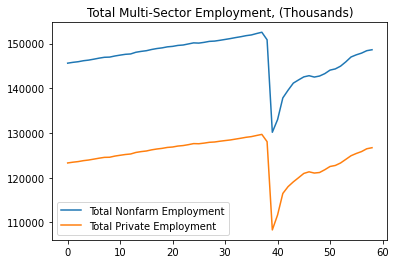

In [17]:
# Simple line plot of the data
df.plot(title='Total Multi-Sector Employment, (Thousands)')

## Employment Data Analysis using Python
### 2021 not included because the dataframe could not include Dec of 2021

In [24]:
# Series stored as a dictionary; 
series_dict = {
               'CEU0600000001':'Goods-producing',
               'CEU0700000001':'Service-providing',
               'CEU4000000001':'Trade, transportation, and utilities',
               'CEU4142000001':'Wholesale trade',
               'CEU4200000001':'Retail trade',
               'CEU6056150001':'Travel arrangement and reservation services',
               'CEU7072250001':'Restaurants and other eating places',
               'CEU7071000001':'Arts, entertainment, and recreation',
               'CEU6054150001':'Computer systems design and related services',
               'CEU6054161001':'Management consulting services'}

# Start year and end year
dates = ('2018', '2020')

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [25]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,Goods-producing,Service-providing,"Trade, transportation, and utilities",Wholesale trade,Retail trade,Travel arrangement and reservation services,Restaurants and other eating places,"Arts, entertainment, and recreation",Computer systems design and related services,Management consulting services
2020-08-01,20188.0,120540.0,26452.0,5565.2,14965.5,153.8,9458.9,1837.9,2180.7,1226.7
2020-09-01,20154.0,121792.0,26512.0,5575.7,14891.9,152.0,9475.7,1760.1,2162.0,1227.5
2020-10-01,20261.0,123307.0,26889.0,5596.4,15131.1,151.2,9628.9,1754.6,2201.7,1253.6
2020-11-01,20203.0,123918.0,27520.0,5615.0,15487.9,148.8,9559.3,1698.8,2203.5,1256.7
2020-12-01,20165.0,123437.0,27799.0,5632.3,15628.2,145.5,9243.2,1605.6,2204.6,1270.0


<AxesSubplot:title={'center':'Total Multi-Sector Employment, Seasonally Adjusted (Thousands)'}>

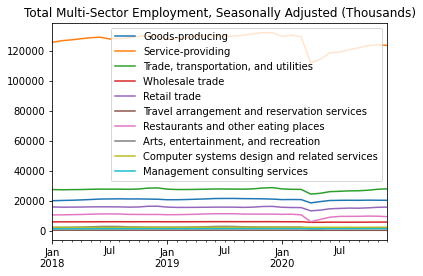

In [26]:
# Simple line plot of the data
df.plot(title='Total Multi-Sector Employment, Seasonally Adjusted (Thousands)')